# Chapter 3 Linear Models for Regression

+ 3.4~3.6 从贝叶斯角度考虑模型选择问题

+ 3.4 比较一般化的讨论

+ 3.5 主要涉及如何在线性回归中确定正则化参数时应用这一思想

+ 3.6 固定基函数的局限性

## 3.4 Bayesian Model Comparison

与极大似然法相关的过拟合问题可以通过参数边缘化（求和或积分）而不是对值做点估计的方式来避免，在这种情况下模型训练不需要验证集，可以直接用训练数据来比较。这样的好处是可以充分利用全部的数据并且减少运算次数（不需要进行交叉验证）。

贝叶斯模型选择涉及概率乘法和加法的应用，并且用概率来表示模型选择的不确定性。

假定要对L个模型作比较，把它们记为{M<sub>i</sub>}(i=1,2,...,L).假设有一个模型生成了观测数据集D的分布，并假设这些模型都有相同的先验p(M<sub>i</sub>),则后验为

p(M<sub>i</sub>|D)$\varpropto$p(M<sub>i</sub>)p(D|M<sub>i</sub>).

在后验中p(D|M<sub>i</sub>)模型证据(model evidence)表达了数据对于不同模型的偏好，模型证据可以被看作是参数边缘化后模型在空间分布上的似然方程，所以也叫边缘似然(marginal likelihood)，两个模型的模型证据之比p(D|M<sub>i</sub>)/p(D|M<sub>j</sub>)就是贝叶斯因子。通常来讲越靠近正确模型的模型，模型证据会越大。

知道模型的后验分布后就可以根据加法乘法法则得到预测分布：

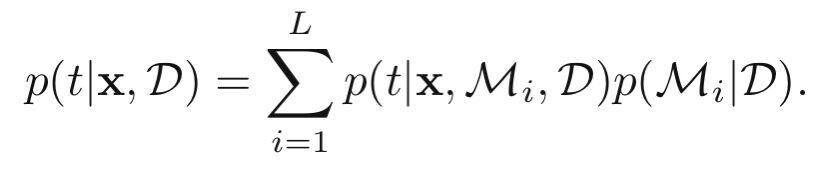

也就是目标值t在每一个模型上的预测分布p(t|x,M<sub>i</sub>,D)用后验p(M<sub>i</sub>|D)加权后进行相加。

考虑两个后验相等的模型，一个在t=a附近预测了一个很窄的分布，一个在t=b附近预测了一个很窄的分布，那么整体的预测分布应该是在t=a和t=b处分别有一个峰的双峰分布而不是一个在t=(a+b)/2处有一个峰的单峰分布。

对模型求平均的一个简单近似就是用最可能的模型做预测，这个过程就是模型选择(model selection)。

对于一个由参数集w控制的模型来说，模型证据由概率的加法和乘法法则给出，就是：

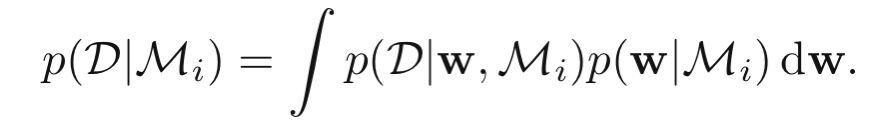

从取样角度来看，模型证据可以看成一个参数是从先验中随机取样的模型生成了观察数据集D的概率。

因为$$p(w|D,M_i)=\frac{p(D|w,M_i)p(w|M_i)}{p(D|M_i)}$$所以模型证据也可以作为参数w后验分布的归一化系数。

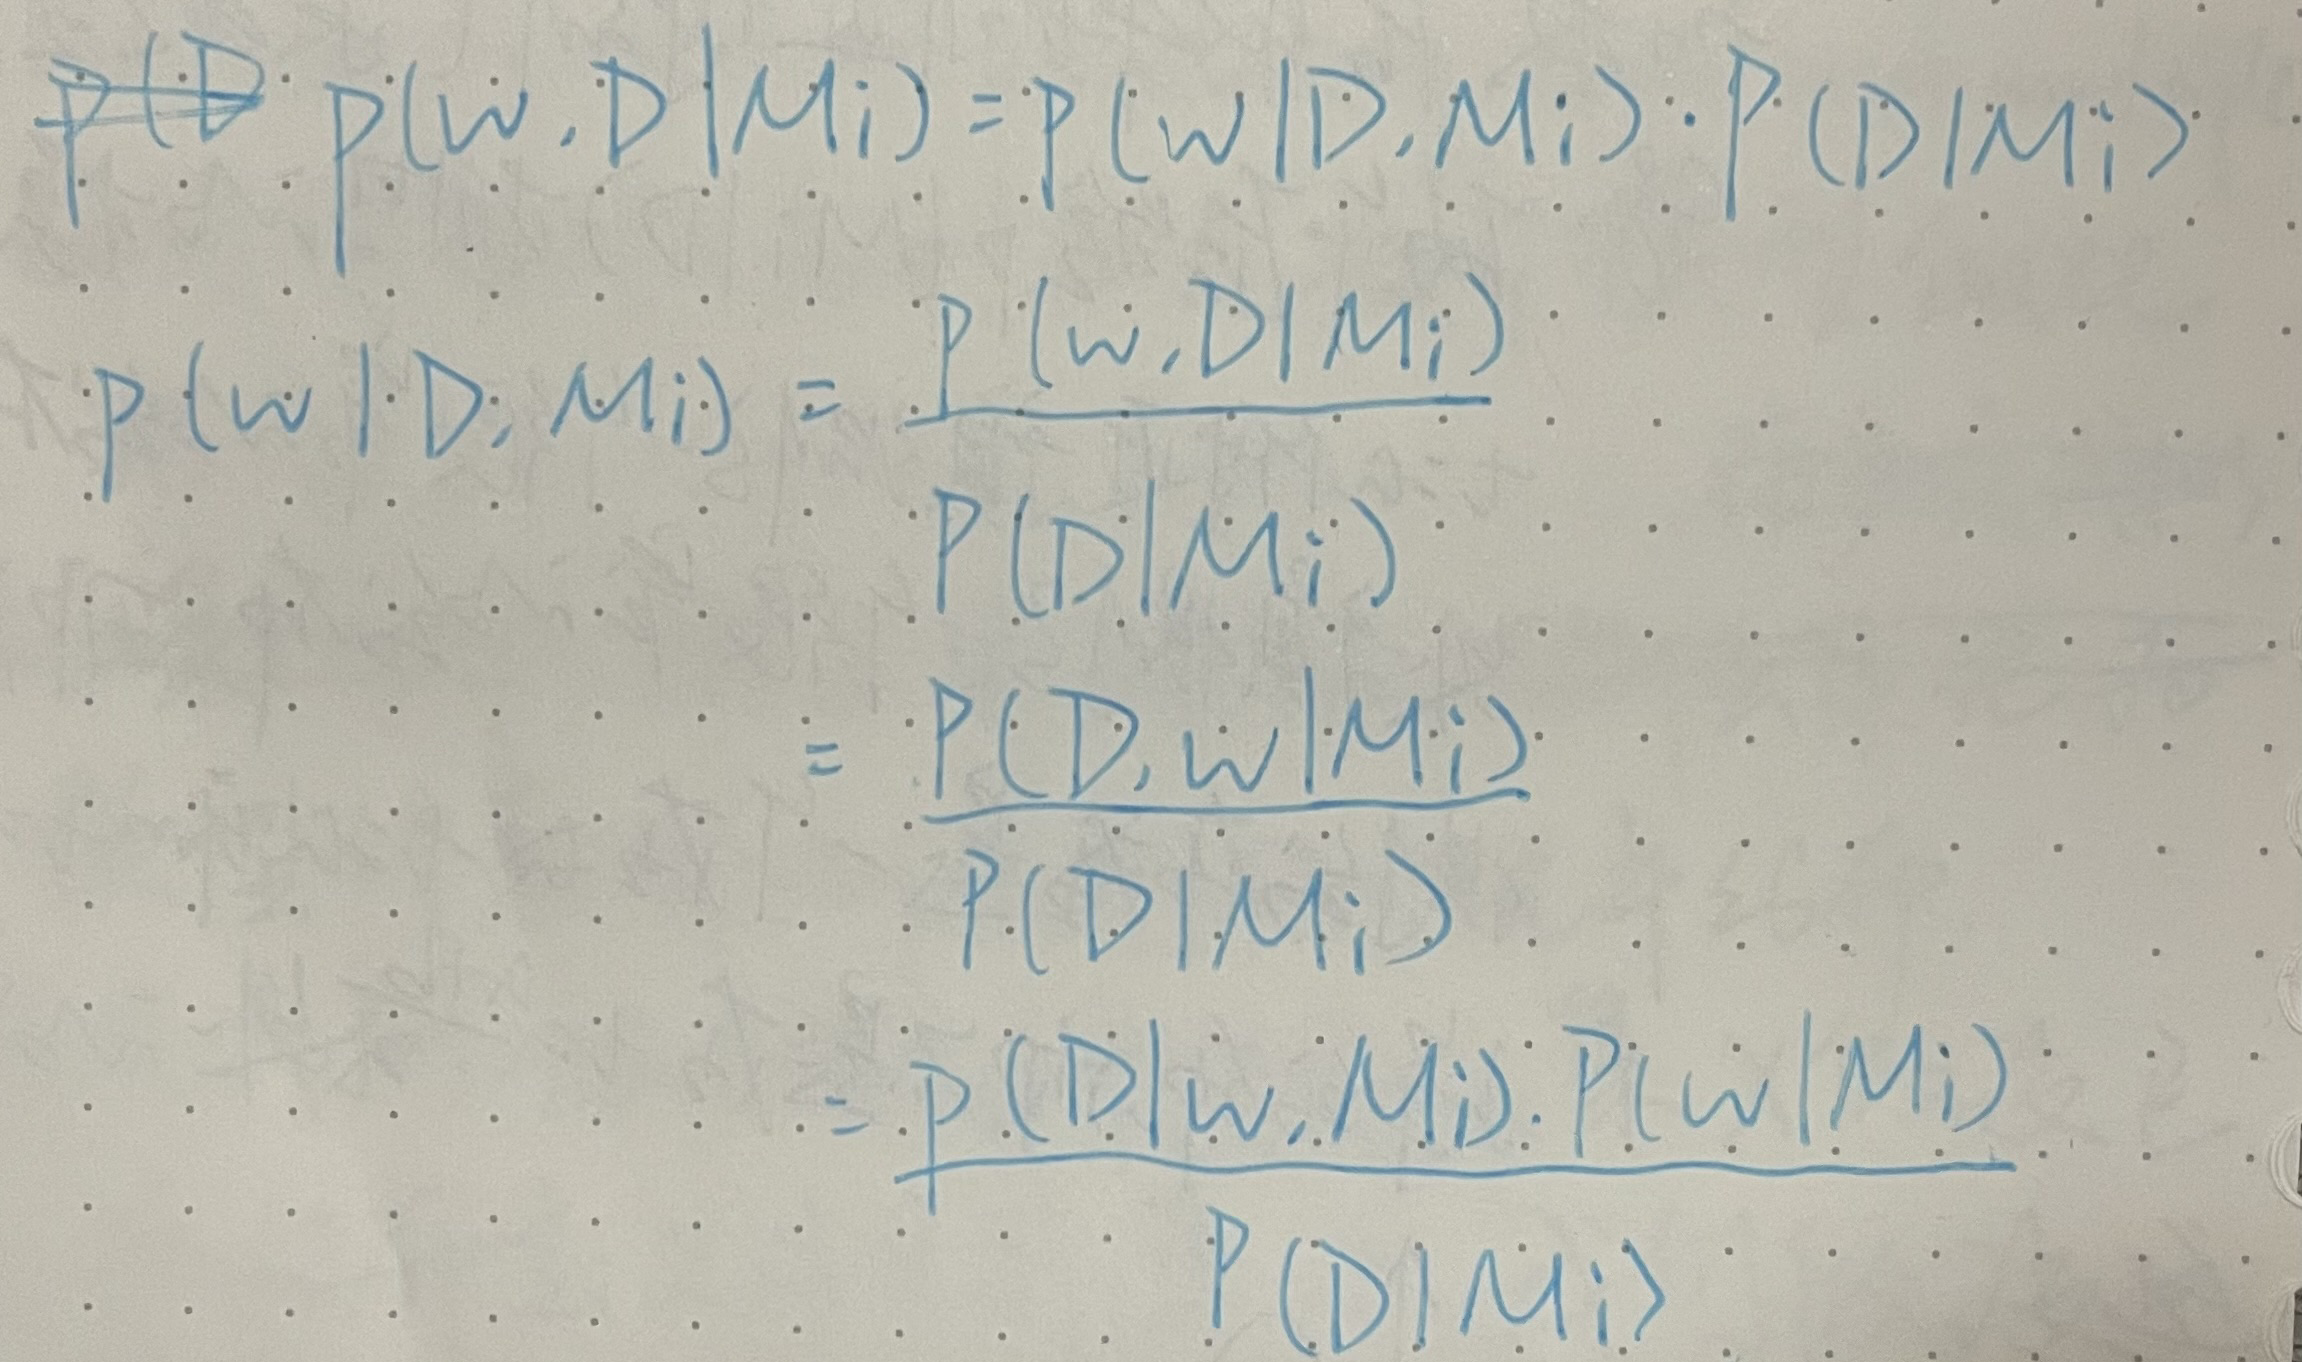

通过对参数模型的简单近似，可以对模型证据有一个更深入的认识。

设模型有一个参数$\omega$,它的后验与p(D|$\omega$)p($\omega$)成比例，假设它的后验在$\omega_{MAP}$附近有一个明显的尖峰，峰的宽度是$\Delta\omega_{posterior}$，则这个积分可以被近似为这个被积函数的最大值乘$\Delta\omega_{posterior}$.在先一步假设$\omega$的先验是一个宽度为$\Delta\omega_{prior}$的平分布，也就是p($\omega$)=$\frac{1}{\Delta\omega_{prior}}$,则有：

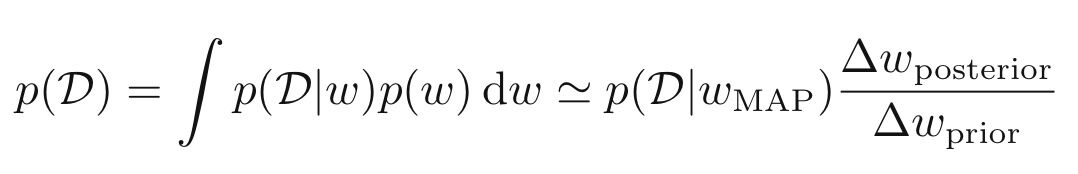

对这个近似结果取对数

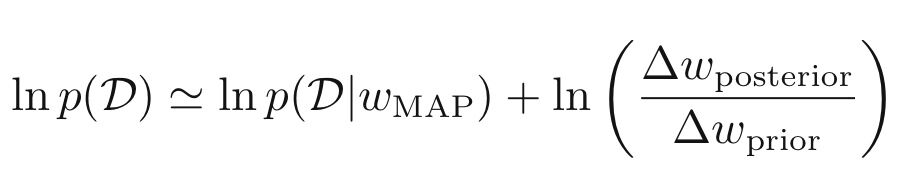

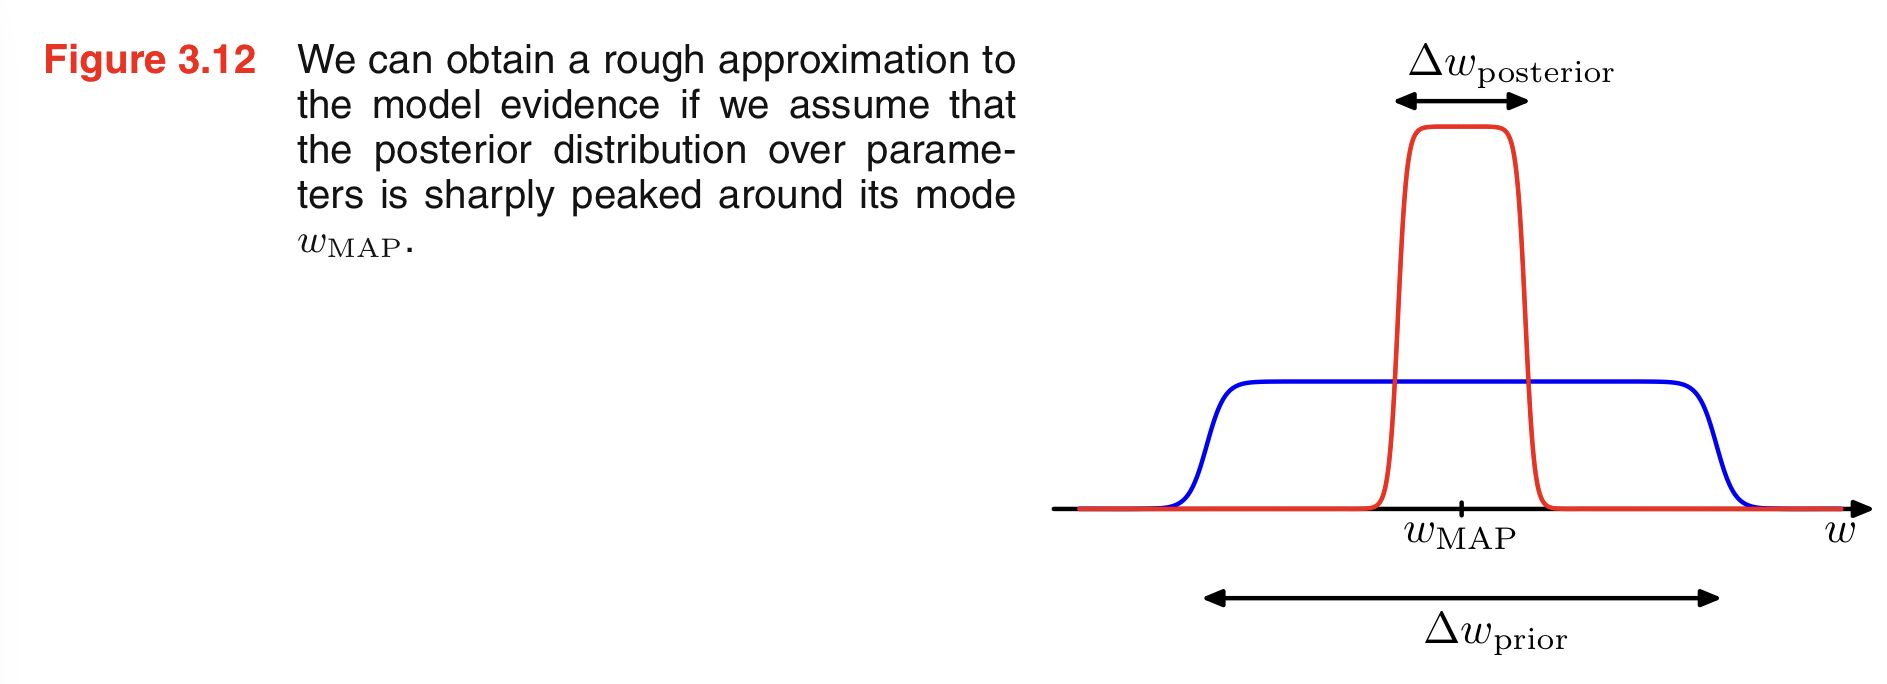

这个式子的第一项代表了最可能参数值$\omega_{MAP}$给出模型的拟合程度（在最可能的参数下得到数据集D的概率）；第二项是针对复杂程度的惩罚项，因为$\Delta\omega_{posterior}<\Delta\omega_{prior}$，所以第二项是一个负值，如果根据后验分布中的数据做精确的调整，$\Delta\omega_{posterior}$就会变小，惩罚项的绝对值就越大。

对于有M个参数的模型，假设它们的$\frac{\Delta\omega_{posterior}}{\Delta\omega_{prior}}都相同，则有

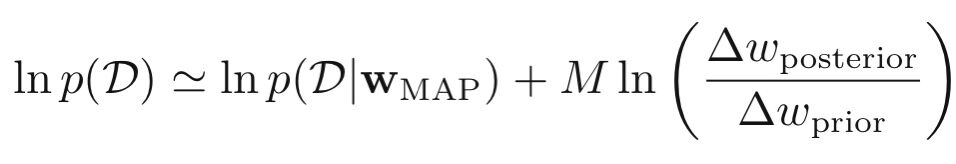

在这种情况下，惩罚项绝对值的大小会与参数的数量呈正相关，同时模型越复杂第一项会越大（拟合程度越好），由最大模型证据确定的最优模型复杂度会在两者之间做出权衡。

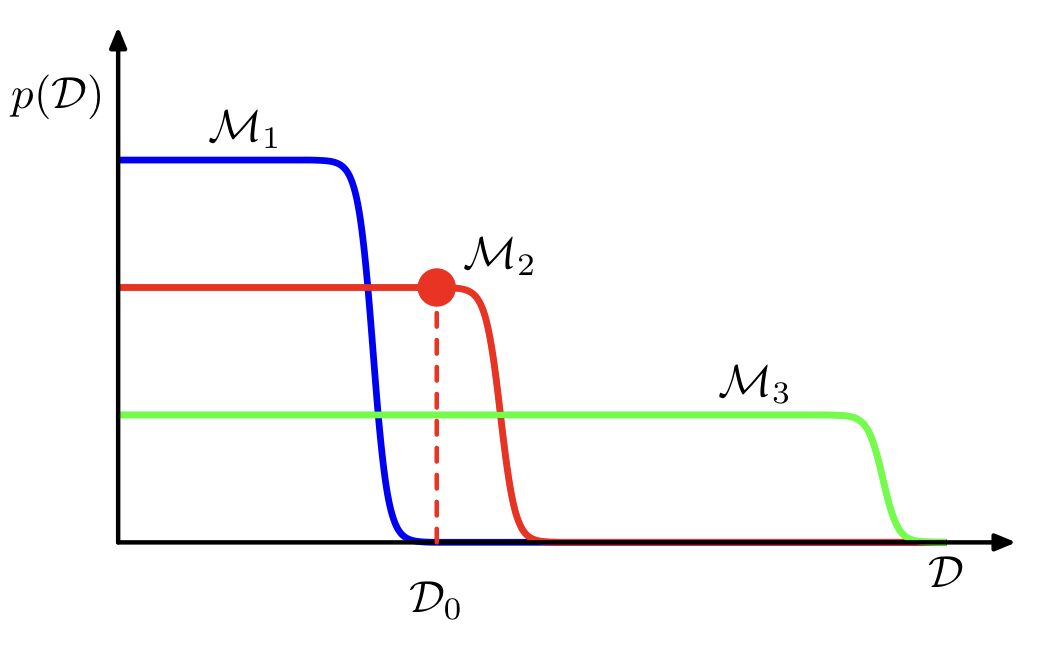

简单的模型（如一次多项式）没有明显的变化性，所以它产生的数据集就会比较相似，它的分布p(D)就会在横轴上对应比较小的距离；相反地，复杂的模型生成的数据集之间的差异会更大，它的分布p(D)在横轴上占据的距离就更多，在模型空间上占据的区域就越大。也就是说，简单的模型不能很好地拟合数据，而过于复杂的模型生成的可能数据太多，导致每一个特定的数据集被赋予的概率都更小。

贝叶斯模型选择过程中有一个隐含的假设：生成观测数据集的真实概率分布包含在考虑的模型中，如果假设成立，则平均来讲贝叶斯模型会选择出正确的模型。对于一个给定的有限数据集来说，确实会出现错误的模型贝叶斯因子反而更大的情况，但是如果把贝叶斯分子在数据集分布上进行平均得到期望贝叶斯因子(对数据的真实分布求平均值)

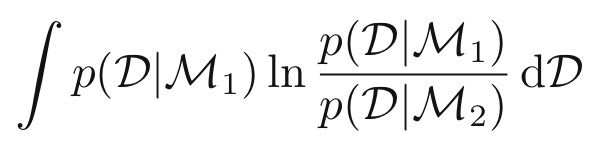

除非两个分布相等时它的值为零，其余时间恒正，因此基本来说，贝叶斯因子总会倾向于选择正确模型。

贝叶斯框架避免了过拟合问题，且可以基于训练数据自身对比不同模型，但是它也有自己的缺陷，就是如果假设了错误的模型，那么结果就会出错，所以在实际应用中，还是需要引入测试集来评估。

## 3.5 The Evidence Approximation

在线性基函数模型的贝叶斯方法中，会引入超参数$\alpha$,$\beta$，然后通过对超参数和参数$\omega$求边缘化的方式来做预测，但是这种情况下的解析解会很难求，所以在这种情况下使用一种先通过最大化对参数$\omega$的模型证据再来确定超参数的具体值的近似方法。

引入$\alpha$,$\beta$上的超先验，再边缘化$\alpha$,$\beta$,$\omega$得到预测分布

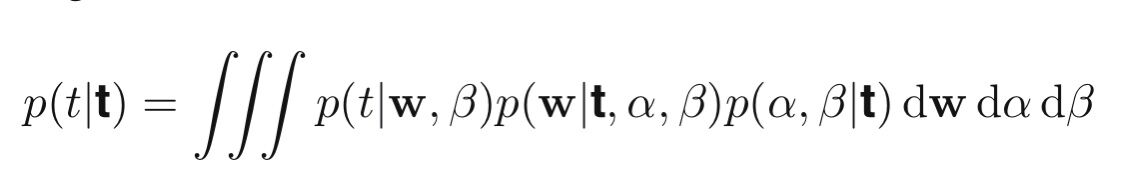

如果后验分布在$\hat{\alpha}$,$\hat{\beta}$附近有尖峰，则固定$\alpha$,$\beta$对$\omega$求积分后这个预测分布可以被近似为

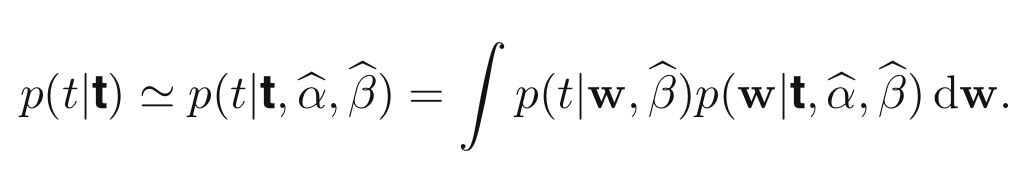

两种最大化的计算方法：令导数为零重新估计$\alpha$和$\beta$（3.5.2）或EM算法（9.3.4）。

### 3.51 Evaluation of the Evidence Function

先通过对权重参数$\omega$进行积分得到边缘函数p(t|$\alpha,\beta$)

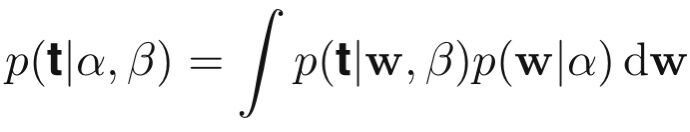

带入p(t|$\omega,\beta$)和p($\omega|\alpha$)的表达式整理后得到

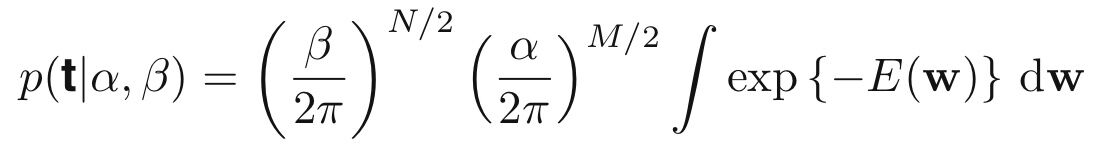

其中M是$\omega$的维数，E(w)=$\frac{\beta}{2}$$\parallel$t-$\Phi$w$\parallel$+$\frac{\alpha}{2}$$w^T$w

对E(w)进行配方，有E(w)=E($m_N$)+$\frac{1}{2}$$(w-m_N)^T$A(w-$m_N$)

其中A=$\alpha$I+$\beta$$\Phi^T$$\Phi$, E($m_N$)=$\frac{\beta}{2}$$\parallel$t-$\Phi$$m_N$$\parallel^2$+$\frac{\alpha}{2}$$m_N^T$$m_N$, $m_N$=$\beta$$A^-1$$\Phi^T$t.

这个时候就可以计算exp{-E(w)}的积分，进一步得到ln p(t|$\alpha,\beta$).

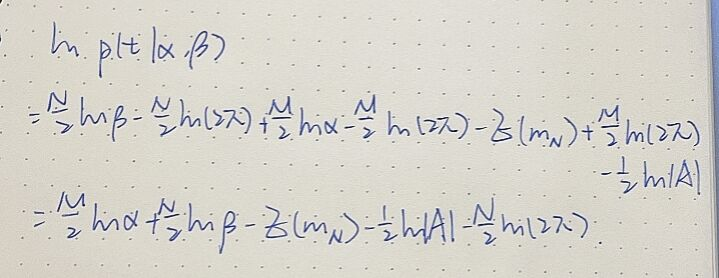

### 3.52 Maximizing the Evidence Function

首先考虑关于$\alpha$来最大化p(t|$\alpha,\beta$).

首先引入特征方程($\beta\Phi^T\Phi$)$u_i$=$\lambda_i$$u_i$, 可知A的特征值为$\alpha+\lambda_i$.接下来对有ln|A|的项求$\alpha$的导数

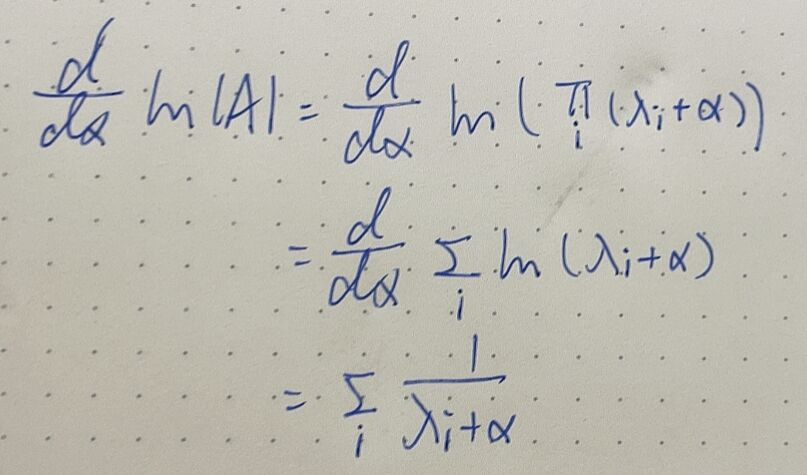

再对ln p(t|$\alpha,\beta$)求$\alpha$的导数并使它为0

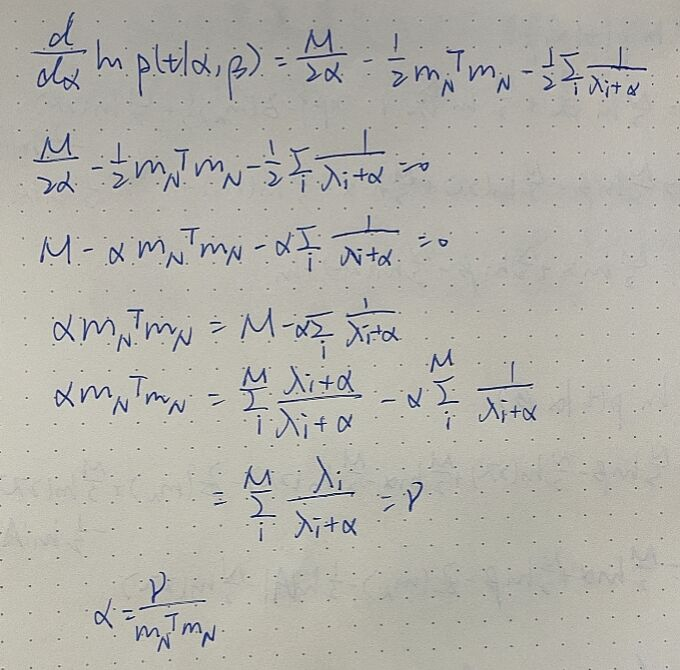

接下来考虑关于$\beta$来使p(t|$\alpha,\beta$)最大化。

从($\beta\Phi^T\Phi$)$u_i$=$\lambda_i$$u_i$可知$\lambda_i与\beta$成比例，所以$\frac{d\lambda_i}{d\beta}=\frac{\lambda}{\beta}$.

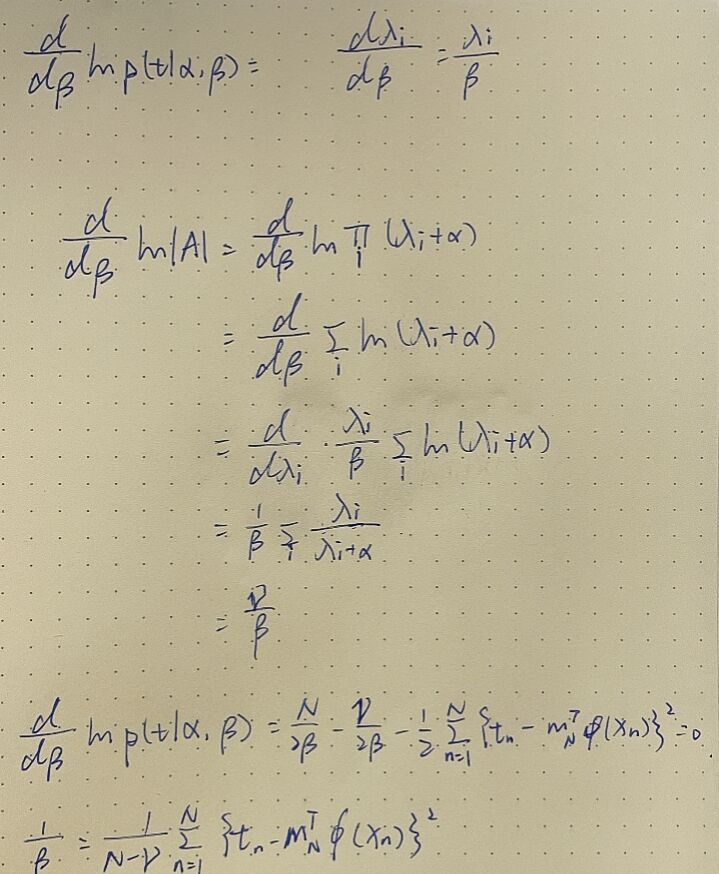

这是一个$\beta$的隐式解，在解这个式子的时候可以选一个$\beta$的初始值，用这个初始值算出$m_N和\gamma$之后重新估计$\beta$值，一直重复到结果收敛。如果$\alpha和\beta$的值都是由数据确定的，则可以在每次更新$\gamma后一起估计\alpha和\beta$的值。

### 3.53 Effiective Number of Parameters

这一部分主要是对$\gamma$的理解。

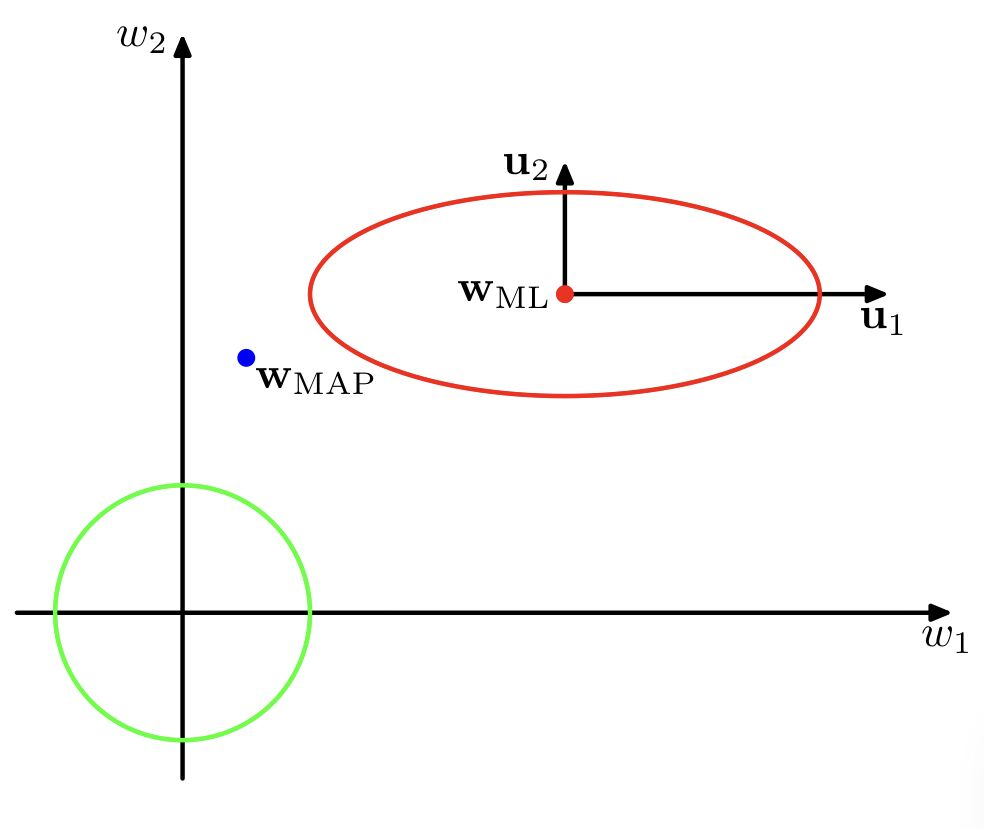

绿色部分：先验

红色部分：似然

$w_{MAP}$:后验尖峰点

$w_{ML}$:最大似然解

因为矩阵$\beta\Phi^T\Phi$正定，所以它的特征值恒正，则$\frac{\lambda_i}{\lambda_i+\alpha}$在0到1之间，$\gamma$在0到M之间。

当$\lambda\gg\alpha$时$\omega_i$就靠近$w_{ML}$, $\frac{\lambda_i}{\lambda_i+\alpha}$靠近1，数据对参数值的影响大，则说这个参数易确定（well decided）。

当$\lambda\ll\alpha$时$\omega_i和\frac{\lambda_i}{\lambda_i+\alpha}$都靠近0，数据对参数值的影响小，参数被先验定义了一个较小的值。

因此$\gamma$度量了有效参数（易确定参数）的数量。

## 3.6 Limitations of Fixed Basis Function

因为在观测数据前已经固定了基函数，所以基函数的数量会随着输入空间D的维度（多为指数型）增长。

真实数据集有两个性质可以减轻这个问题，一个是输入变量之间存在强相关性，所以数据向量{$X_n$}通常非常靠近一个固有维度小于输入空间固有维度的流形（只占据输入空间的一部分）；另一个是目标变量可能只对数据流形内的少量可能方向有显著依赖性，可以在输入空间中选择基函数相应的方向来利用这一特性。